In [1]:
import rdkit
import rdkit.Chem as Chem
import rdkit.Chem.rdMolDescriptors
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcCrippenDescriptors, CalcNumLipinskiHBA, CalcNumLipinskiHBD, CalcFractionCSP3, CalcNumRotatableBonds, CalcNumRings, CalcTPSA, CalcNumAromaticRings

import math
import time
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,7)


import sklearn
import sklearn.model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix



first = time.time()

# ==================================================
# 1-1번
* 데이터 전처리

In [2]:
ask = pd.read_csv("ASK1_data.csv")

properties = {"MW":[], "LogP":[], "HBA":[], "HBD": [], 
              "CSP3": [], "NumRotBond": [], "NumRings": [], "TPSA": [], 
              "NumAromaticRings": [], "Bioactivity": []}

for idx, smiles in enumerate(ask["SMILES"]):
    mol = Chem.MolFromSmiles(smiles)
    if mol == None: 
        continue
        
    properties["MW"].append(CalcExactMolWt(mol))
    properties["LogP"].append(CalcCrippenDescriptors(mol)[0])
    properties["HBA"].append(CalcNumLipinskiHBA(mol))
    properties["HBD"].append(CalcNumLipinskiHBD(mol))
    properties["CSP3"].append(CalcFractionCSP3(mol))
    properties["NumRotBond"].append(CalcNumRotatableBonds(mol))
    properties["NumRings"].append(CalcNumRings(mol))
    properties["TPSA"].append(CalcTPSA(mol))
    properties["NumAromaticRings"].append(CalcNumAromaticRings(mol))
    properties["Bioactivity"].append(ask["Bioactivity"].iloc[idx])

data1 = pd.DataFrame(properties)   
X1 = data1.iloc[:,:-1]
y1 = data1.iloc[:,-1]
X_train1, X_test1, y_train1, y_test1 = sklearn.model_selection.train_test_split(X1, y1, test_size=0.25, random_state=201512822)

* 대충의 N값 찾기

In [3]:
start = time.time()

min_mse = 1000
for n in range(100,1000,100):
    X_train = X_train1
    X_test = X_test1
    y_train = y_train1
    y_test = y_test1
    model = RandomForestRegressor(n_estimators = n ,random_state= 201512822)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    doublemse = mean_squared_error(y_test, y_pred)
    mse = math.sqrt(doublemse)
    if min_mse > mse:
        min_mse = mse
        min_n = n
        print("계산중 갱신! ", mse, "이때의 n = ", n)
    
print("--계산끝--")
print("Runtime :", round(time.time() - start,2),"초")
print("min_mse =" ,min_mse,", n = ",min_n)

계산중 갱신!  547.2223214252804 이때의 n =  100
계산중 갱신!  545.4661221911601 이때의 n =  200
--계산끝--
Runtime : 10.5 초
min_mse = 545.4661221911601 , n =  200


*  최적의 N값 찾기

In [4]:
start = time.time()

min_mse = 1000
for n in range(150,251,5):
    X_train = X_train1
    X_test = X_test1
    y_train = y_train1
    y_test = y_test1
    model = RandomForestRegressor(n_estimators = n ,random_state= 201512822)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    doublemse = mean_squared_error(y_test, y_pred)
    mse = math.sqrt(doublemse)
    if min_mse > mse:
        min_mse = mse
        min_n = n
        print("계산중 갱신! ", mse, "이때의 n = ", n)
    
print("--계산끝--")
print("Runtime :", round(time.time() - start,2),"초")
print("min_mse =" ,min_mse,", n =",min_n)

계산중 갱신!  545.6346199127643 이때의 n =  150
계산중 갱신!  545.3877253626483 이때의 n =  155
계산중 갱신!  545.2184114900047 이때의 n =  165
계산중 갱신!  545.1649393083038 이때의 n =  185
계산중 갱신!  544.9880049079662 이때의 n =  190
--계산끝--
Runtime : 9.83 초
min_mse = 544.9880049079662 , n = 190


* N=190 일때, bioactivity 예측

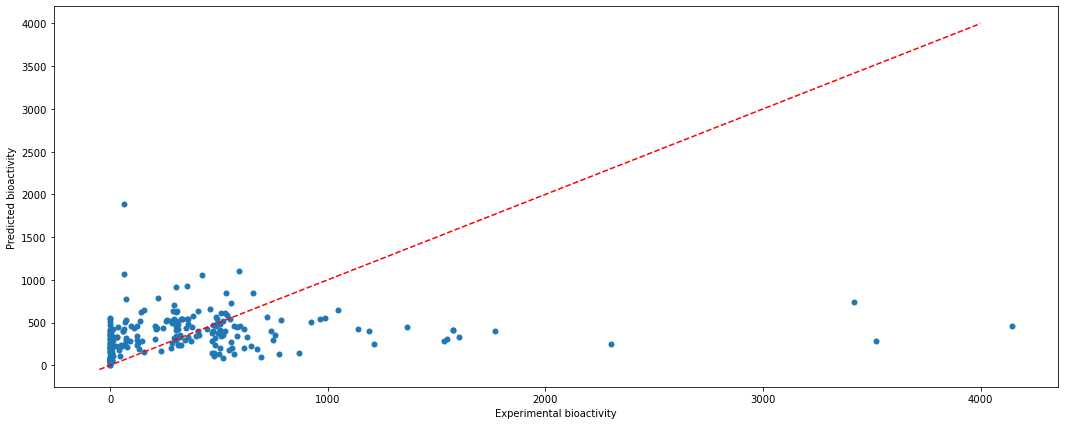

In [5]:
best_model1 = RandomForestRegressor(n_estimators = 190 ,random_state= 201512822)
best_model1.fit(X_train1, y_train1)
best_y_pred1 = best_model1.predict(X_test1)
plt.scatter(y_test1, best_y_pred1,s=25)
plt.xlabel("Experimental bioactivity")
plt.ylabel("Predicted bioactivity")
plt.plot(range(-50, 4000), range(-50, 4000), "r--", label = "y=x")

# ==================================================
# 1-2번
* 데이터 전처리

In [6]:
ask = pd.read_csv("ASK1_data.csv")

properties = {"MW":[], "LogP":[], "HBA":[], "HBD": [], 
              "CSP3": [], "NumRotBond": [], "NumRings": [], "TPSA": [], 
              "NumAromaticRings": [], "Inhibitor": []}

for idx, smiles in enumerate(ask["SMILES"]):
    mol = Chem.MolFromSmiles(smiles)
    if mol == None: 
        continue
        
    properties["MW"].append(CalcExactMolWt(mol))
    properties["LogP"].append(CalcCrippenDescriptors(mol)[0])
    properties["HBA"].append(CalcNumLipinskiHBA(mol))
    properties["HBD"].append(CalcNumLipinskiHBD(mol))
    properties["CSP3"].append(CalcFractionCSP3(mol))
    properties["NumRotBond"].append(CalcNumRotatableBonds(mol))
    properties["NumRings"].append(CalcNumRings(mol))
    properties["TPSA"].append(CalcTPSA(mol))
    properties["NumAromaticRings"].append(CalcNumAromaticRings(mol))
    properties["Inhibitor"].append(ask["Active"].iloc[idx])

data2 = pd.DataFrame(properties)   
X2 = data2.iloc[:,:-1]
y2 = data2.iloc[:,-1]
X_train2, X_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(X2, y2, test_size=0.25, random_state=201512822)

* 대충의 N값 찾기

In [7]:
start = time.time()

max_f1 = 0
for n in range(100,1000,100):
    X_train = X_train2
    X_test = X_test2
    y_train = y_train2
    y_test = y_test2
    model = RandomForestClassifier(n_estimators = n ,random_state= 201512822)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    if f1 > max_f1:
        max_f1 = f1
        max_n = n
        print("계산중 갱신! ", f1, " 이때의 n =", n)
    
print("--계산끝--")
print("Runtime :", round(time.time() - start,2),"초")
print("max_f1=" ,max_f1,", n =",max_n)

계산중 갱신!  0.7741935483870969  이때의 n = 100
--계산끝--
Runtime : 6.25 초
max_f1= 0.7741935483870969 , n = 100


* 최적의 N값 찾기

In [8]:
start = time.time()

max_f1 = 0
for n in range(10,210,5):
    X_train = X_train2
    X_test = X_test2
    y_train = y_train2
    y_test = y_test2
    model = RandomForestClassifier(n_estimators = n ,random_state= 201512822)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    if f1 > max_f1:
        max_f1 = f1
        max_n = n
        print("계산중 갱신! ", f1, " 이때의 n =", n,)
    
print("--계산끝--")
print("Runtime :", round(time.time() - start,2),"초")
print("max_f1=" ,max_f1,", n =",max_n)

계산중 갱신!  0.7027027027027027  이때의 n = 10
계산중 갱신!  0.7482014388489209  이때의 n = 15
계산중 갱신!  0.749063670411985  이때의 n = 20
계산중 갱신!  0.7581227436823105  이때의 n = 25
계산중 갱신!  0.7636363636363636  이때의 n = 60
계산중 갱신!  0.7725631768953068  이때의 n = 65
계산중 갱신!  0.7741935483870969  이때의 n = 100
계산중 갱신!  0.7753623188405797  이때의 n = 120
--계산끝--
Runtime : 6.07 초
max_f1= 0.7753623188405797 , n = 120


* N=120 일때, 예측모델의 분류성능평가지표

In [9]:
best_model2 = RandomForestClassifier(n_estimators = 120 ,random_state= 201512822)
best_model2.fit(X_train2, y_train2)
best_y_pred2 = best_model2.predict(X_test2)
TN, FP, FN, TP = confusion_matrix(y_test2, best_y_pred2).ravel()
df = ([TP,FP],[FN,TN])
pd.DataFrame(df,index=['pred_true', 'pred_false'], columns=['real_true', 'real_false'])

,real_true,real_false
pred_true,107,30
pred_false,32,58


* N=120 일때, 예측 모델의 Precision, Recall, F1 score

In [10]:
print("Precision score =",precision_score(y_test, best_y_pred2))
print("Recall score    =",recall_score(y_test, best_y_pred2))

print("\nF1 score        =",f1_score(y_test, best_y_pred2))

Precision score = 0.781021897810219
Recall score    = 0.7697841726618705

F1 score        = 0.7753623188405797


# ==================================================
# 2-1번

* 데이터 전처리

In [11]:
osc = pd.read_csv("SMILES_oscillator_strength.csv")

properties = {"MW":[], "LogP":[], "HBA":[], "HBD": [], 
              "CSP3": [], "NumRotBond": [], "NumRings": [], "TPSA": [], 
              "NumAromaticRings": [], "Oscillator strength": []}

for idx, smiles in enumerate(osc["SMILES"]):
    mol = Chem.MolFromSmiles(smiles)
    if mol == None: 
        continue
        
    properties["MW"].append(CalcExactMolWt(mol))
    properties["LogP"].append(CalcCrippenDescriptors(mol)[0])
    properties["HBA"].append(CalcNumLipinskiHBA(mol))
    properties["HBD"].append(CalcNumLipinskiHBD(mol))
    properties["CSP3"].append(CalcFractionCSP3(mol))
    properties["NumRotBond"].append(CalcNumRotatableBonds(mol))
    properties["NumRings"].append(CalcNumRings(mol))
    properties["TPSA"].append(CalcTPSA(mol))
    properties["NumAromaticRings"].append(CalcNumAromaticRings(mol))
    properties["Oscillator strength"].append(osc["OS"].iloc[idx])

data = pd.DataFrame(properties)   
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=201512822)



* 대충의 N값 찾기

In [12]:
start = time.time()

min_mse = 1000
for n in range(1000,1501,100):
    model = RandomForestRegressor(n_estimators = n ,random_state= 201512822)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    doublemse = mean_squared_error(y_test, y_pred)
    mse = math.sqrt(doublemse)
    if min_mse > mse:
        min_mse = mse
        min_n = n
        print("계산중 갱신! ", mse, "이때의 n = ", n)
    
print("--계산끝--")
print("Runtime :", round(time.time() - start,2),"초")
print("min_mse =" ,min_mse,", n = ",min_n)

계산중 갱신!  0.1270534011392662 이때의 n =  1000
계산중 갱신!  0.12703583819219794 이때의 n =  1100
계산중 갱신!  0.1270262372215245 이때의 n =  1200
계산중 갱신!  0.1269993302933779 이때의 n =  1300
--계산끝--
Runtime : 556.77 초
min_mse = 0.1269993302933779 , n =  1300


* 최적의 N값 찾기

In [13]:
start = time.time()

min_mse = 1000
for n in range(1250,1401,25):
    model = RandomForestRegressor(n_estimators = n ,random_state= 201512822)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    doublemse = mean_squared_error(y_test, y_pred)
    mse = math.sqrt(doublemse)
    if min_mse > mse:
        min_mse = mse
        min_n = n
        print("계산중 갱신! ", mse, "이때의 n = ", n)
    
print("--계산끝--")
print("Runtime :", round(time.time() - start,2),"초")
print("min_mse =" ,min_mse,", n = ",min_n)

계산중 갱신!  0.12699798793348654 이때의 n =  1250
계산중 갱신!  0.12698674566124324 이때의 n =  1275
--계산끝--
Runtime : 692.37 초
min_mse = 0.12698674566124324 , n =  1275


* N=1275 일때, 성능 Test

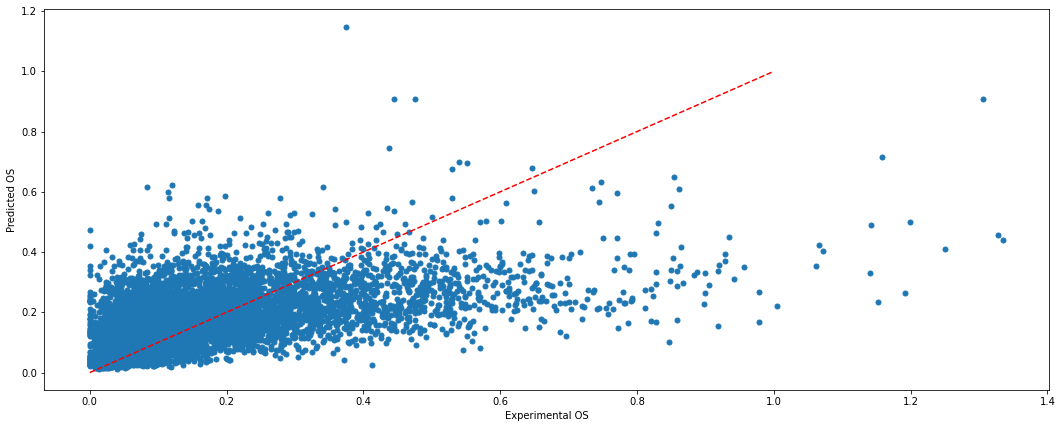

In [14]:
best_model3 = RandomForestRegressor(n_estimators = 1275 ,random_state= 201512822)
best_model3.fit(X_train, y_train)
best_y_pred3 = best_model3.predict(X_test)
plt.scatter(y_test, best_y_pred3,s=25)
plt.xlabel("Experimental OS")
plt.ylabel("Predicted OS")
plt.plot(range(0, 2), range(0, 2), "r--", label = "y=x")

# ==================================================
# 2-2번
* N=1275 일때, Feature Importance

In [15]:
FI = best_model3.feature_importances_
col = data.columns
sortFI = sorted(FI)
sortFI.sort(reverse=True)
for i in range(0,len(sortFI)):
    for k in range(0, len(FI)):
        if sortFI[i] == FI[k]:
            print(i+1,"번째로 중요한 feature는",col[k],"입니다.")
            print("\t\t",col[k],"의 Importance는 ",round(sortFI[i]*100,2),"% 입니다.\n")
            

1 번째로 중요한 feature는 CSP3 입니다.
		 CSP3 의 Importance는  33.39 % 입니다.

2 번째로 중요한 feature는 LogP 입니다.
		 LogP 의 Importance는  21.36 % 입니다.

3 번째로 중요한 feature는 MW 입니다.
		 MW 의 Importance는  14.51 % 입니다.

4 번째로 중요한 feature는 TPSA 입니다.
		 TPSA 의 Importance는  13.05 % 입니다.

5 번째로 중요한 feature는 NumRotBond 입니다.
		 NumRotBond 의 Importance는  6.32 % 입니다.

6 번째로 중요한 feature는 HBD 입니다.
		 HBD 의 Importance는  3.48 % 입니다.

7 번째로 중요한 feature는 NumAromaticRings 입니다.
		 NumAromaticRings 의 Importance는  2.73 % 입니다.

8 번째로 중요한 feature는 NumRings 입니다.
		 NumRings 의 Importance는  2.61 % 입니다.

9 번째로 중요한 feature는 HBA 입니다.
		 HBA 의 Importance는  2.56 % 입니다.



In [16]:
print("모든 계산의 Runtime :", round(time.time() - first,2),"초")

모든 계산의 Runtime : 1395.1 초
